In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [66]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
df = pd.read_csv('amazon_alexa.tsv',sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


<Axes: xlabel='rating', ylabel='count'>

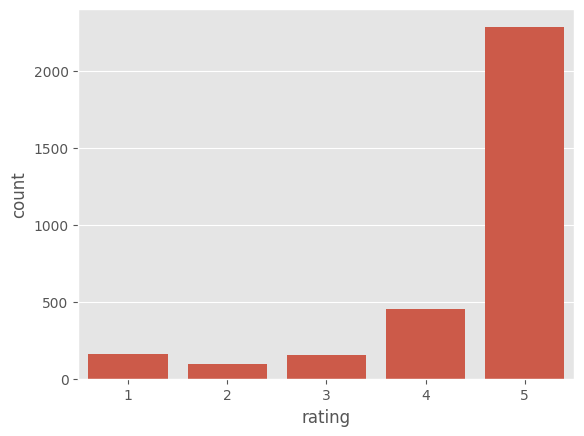

In [69]:
sns.countplot(x='rating', data=df)

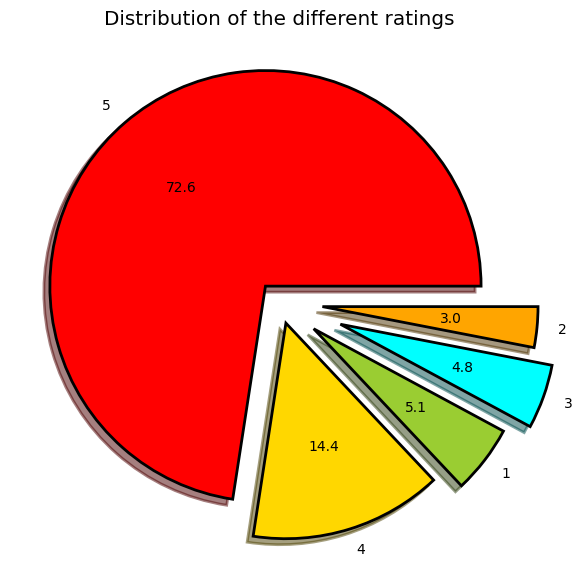

In [70]:
fig = plt.figure(figsize=(7,7))
colors = ("red","gold","yellowgreen","cyan","orange")
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['rating'].value_counts()
explode = (0.1,0.1,0.2,0.3,0.2)
tags.plot(kind='pie', autopct='%1.1f',colors=colors, shadow=True,
          startangle=0, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of the different ratings')
plt.show()

<Axes: xlabel='variation', ylabel='count'>

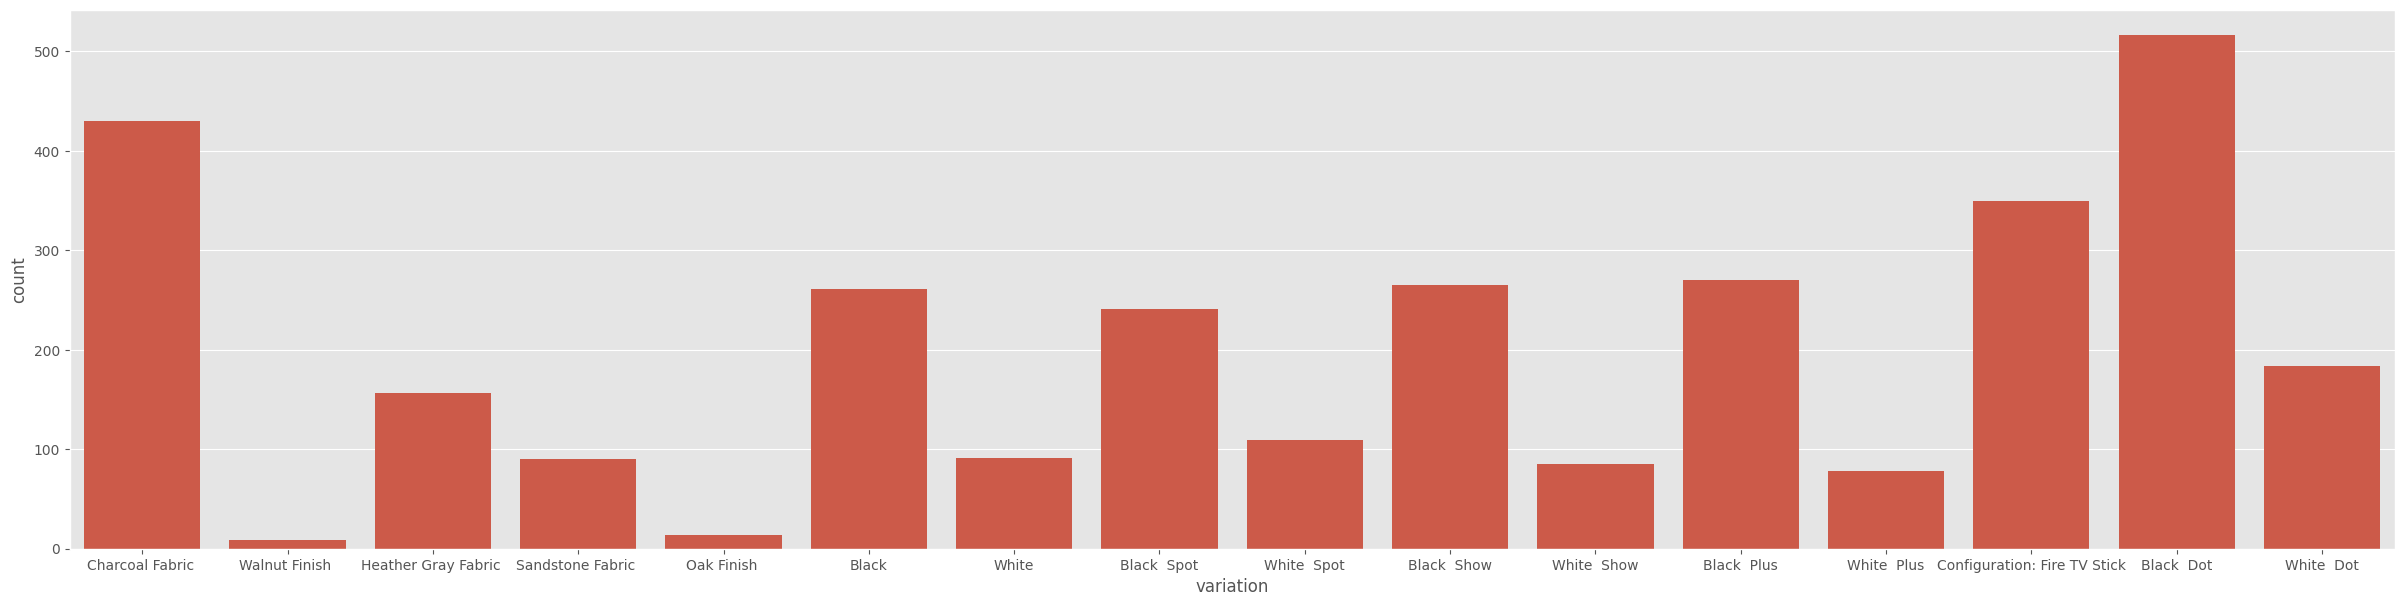

In [71]:
fig = plt.figure(figsize=(30,7))
sns.countplot(x="variation",data=df)

<Axes: xlabel='count', ylabel='variation'>

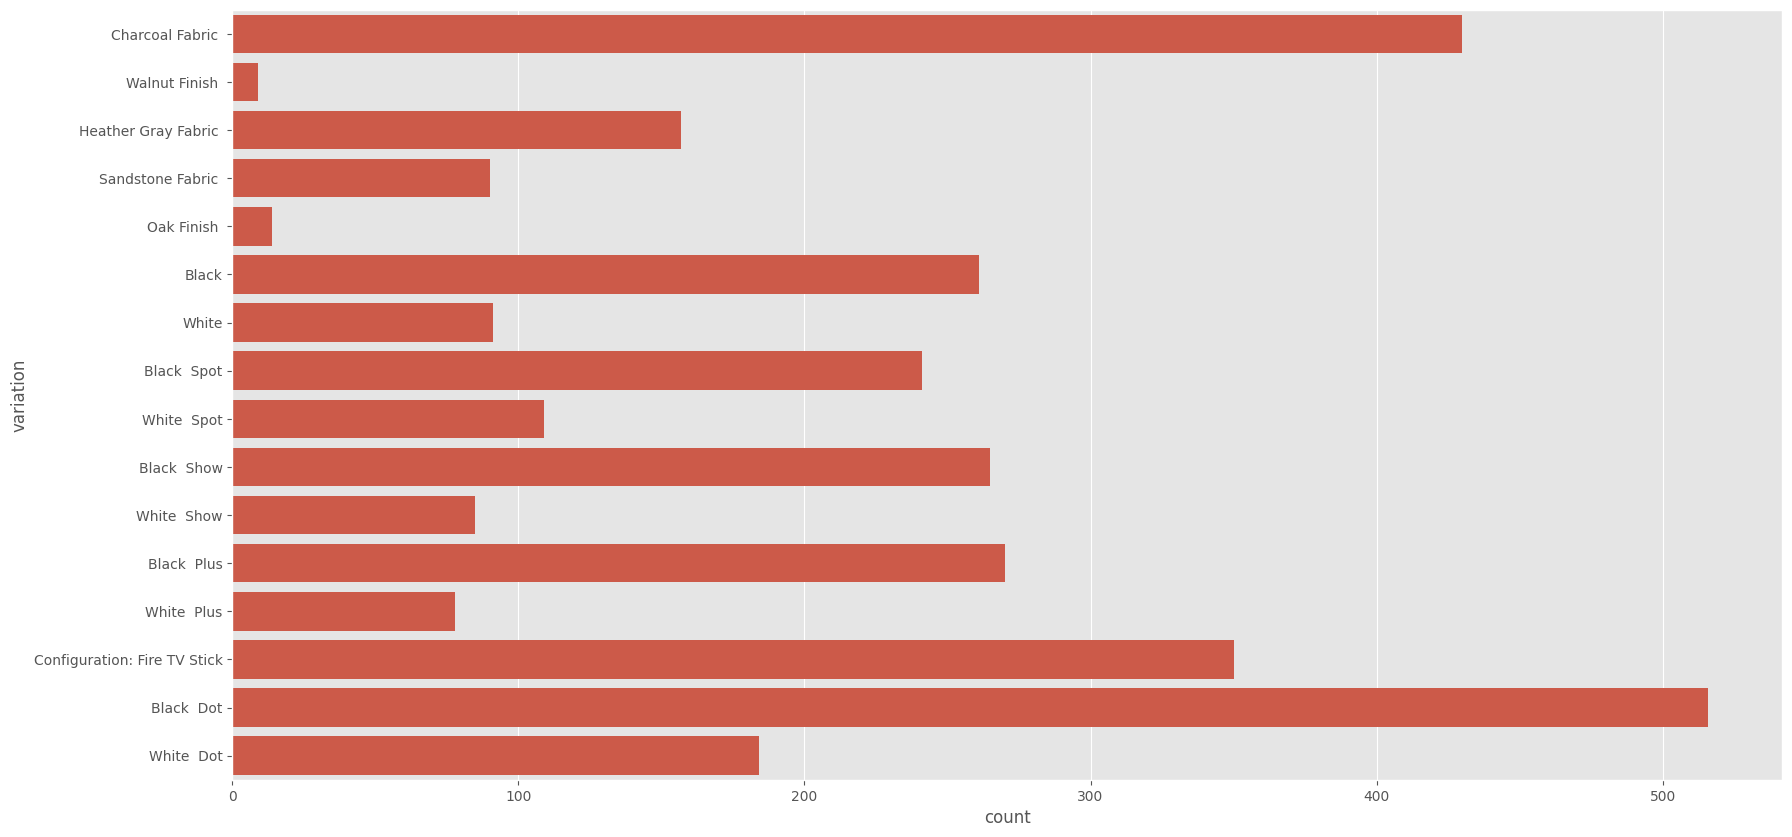

In [72]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y="variation",data=df)

In [73]:
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

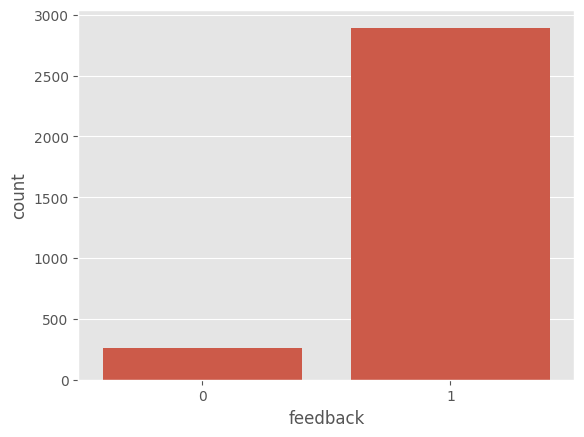

In [74]:
sns.countplot(x='feedback', data=df)
plt.show()

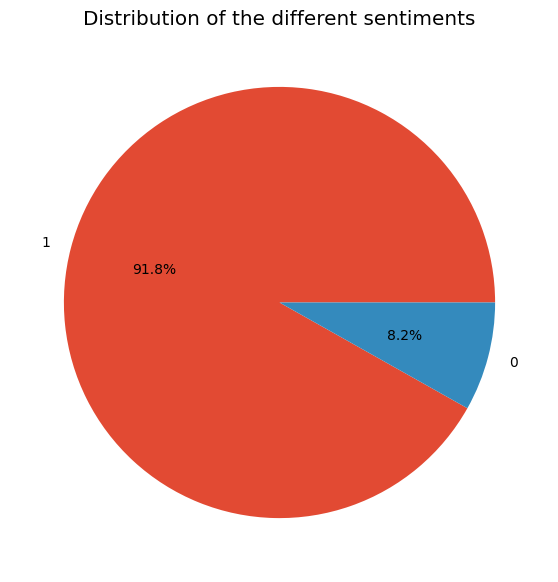

In [75]:
fig = plt.figure(figsize=(7,7))
tags = df['feedback'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', label='')
plt.title("Distribution of the different sentiments")
plt.show()

In [76]:
for i in range(5):
    print(df['verified_reviews'].iloc[i],"\n")

Love my Echo! 

Loved it! 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

Music 



In [77]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"http\S+www\S+|https\S+", '', text, flags= re.MULTILINE)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [78]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
df.verified_reviews = df['verified_reviews'].apply(data_processing)

In [80]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [81]:
df['verified_reviews'] = df['verified_reviews'].apply(lambda x: stemming(x))

In [82]:
for i in range(5):
    print(df['verified_reviews'].iloc[i],"\n")

love echo 

loved 

sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home 

lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well 

music 



In [83]:
pos_reviews = df[df.feedback == 1]
pos_reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love echo,1
1,5,31-Jul-18,Charcoal Fabric,loved,1
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learns dinosaurs contro...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


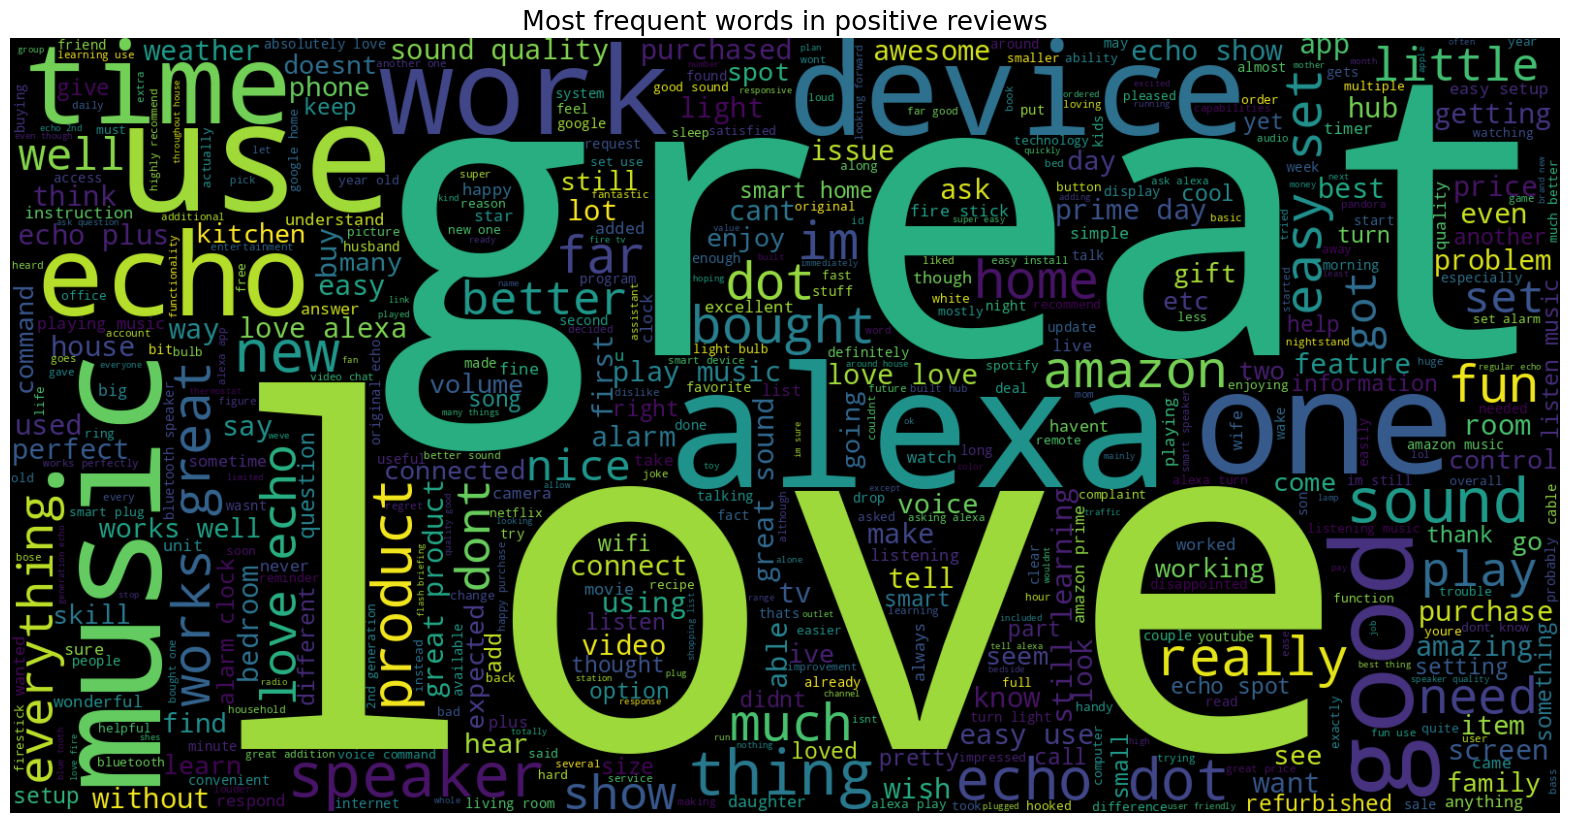

In [84]:
text = ' '.join([word for word in pos_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()

In [85]:
neg_reviews = df[df.feedback==0]
neg_reviews.head()

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,like siri fact siri answers accurately alexa d...,0
111,2,30-Jul-18,Charcoal Fabric,sound terrible u want good music get bose,0
141,1,30-Jul-18,Charcoal Fabric,much features,0
162,1,30-Jul-18,Sandstone Fabric,stopped working 2 weeks didnt follow commands ...,0
176,2,30-Jul-18,Heather Gray Fabric,sad joke worthless,0


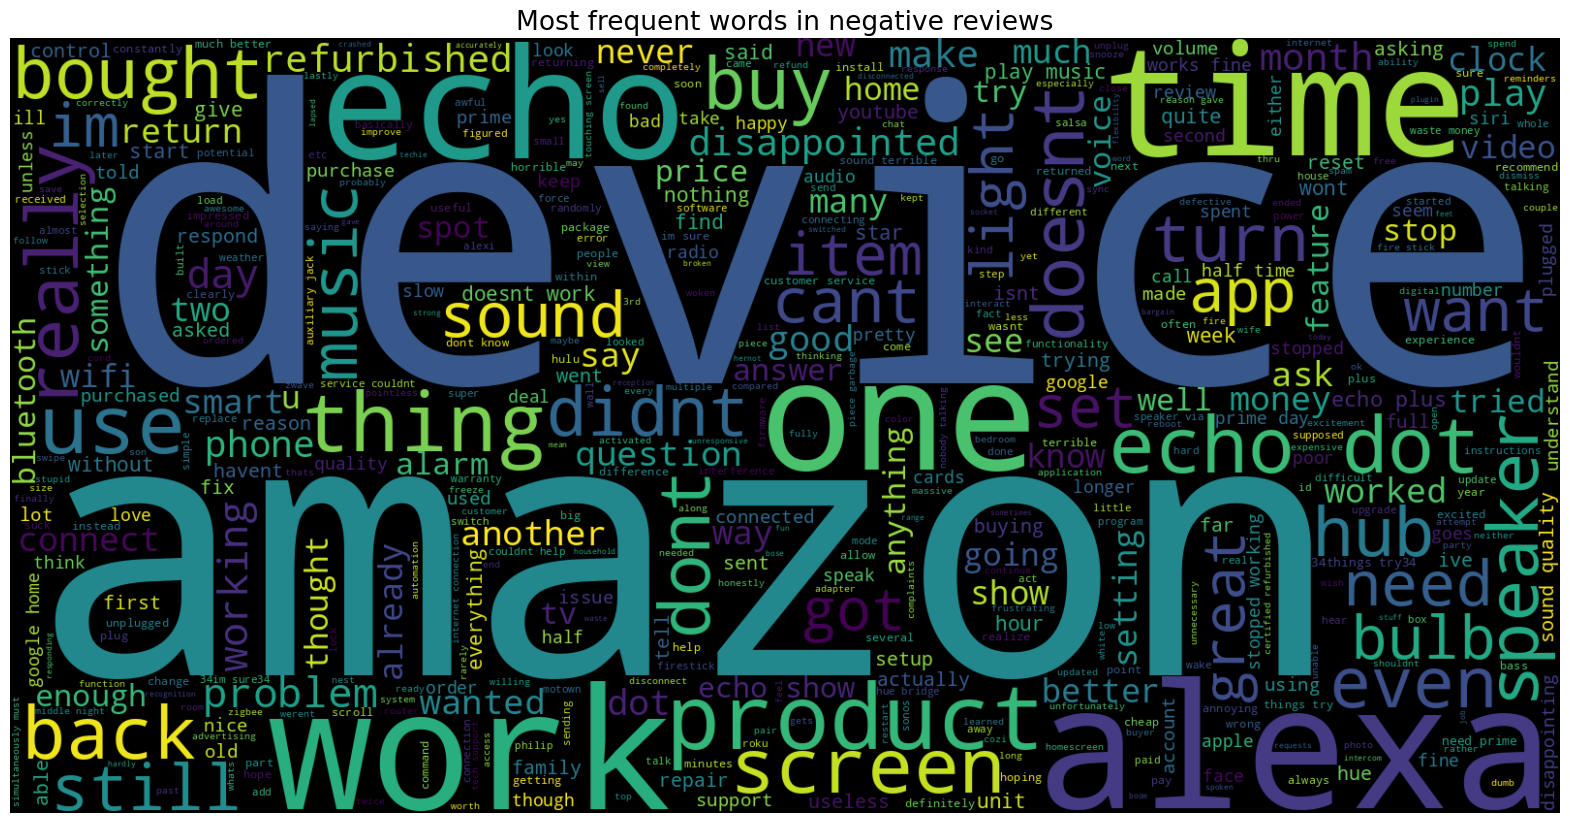

In [86]:
text = ' '.join([word for word in neg_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize=19)
plt.show()

In [87]:
X = df['verified_reviews']
Y = df['feedback']

In [88]:
cv = CountVectorizer()
X = cv.fit_transform(df['verified_reviews'])

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [90]:
print("Size of x_train: ",(x_train.shape))
print("Size of y_train: ",(y_train.shape))
print("Size of x_test: ",(x_test.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (2520, 4364)
Size of y_train:  (2520,)
Size of x_test:  (630, 4364)
Size of y_test:  (630,)


In [91]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [92]:
from keras.models import Sequential
from keras.layers import Dense

## Neural Network configuration 1


In [93]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [94]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
history = model.fit(x_train, y_train, batch_size = 10, epochs=10)

Epoch 1/10
252/252 [==============================] - 1s 3ms/step - loss: 0.3780 - accuracy: 0.9183
Epoch 2/10
252/252 [==============================] - 1s 3ms/step - loss: 0.2367 - accuracy: 0.9214
Epoch 3/10
252/252 [==============================] - 1s 3ms/step - loss: 0.1848 - accuracy: 0.9317
Epoch 4/10
252/252 [==============================] - 1s 3ms/step - loss: 0.1496 - accuracy: 0.9480
Epoch 5/10
252/252 [==============================] - 1s 3ms/step - loss: 0.1194 - accuracy: 0.9548
Epoch 6/10
252/252 [==============================] - 1s 3ms/step - loss: 0.1023 - accuracy: 0.9623
Epoch 7/10
252/252 [==============================] - 1s 3ms/step - loss: 0.0868 - accuracy: 0.9679
Epoch 8/10
252/252 [==============================] - 1s 2ms/step - loss: 0.0727 - accuracy: 0.9718
Epoch 9/10
252/252 [==============================] - 1s 2ms/step - loss: 0.0641 - accuracy: 0.9742
Epoch 10/10
252/252 [==============================] - 1s 2ms/step - loss: 0.0563 - accuracy: 0.9794

In [96]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                69840     
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 69985 (273.38 KB)
Trainable params: 69985 (273.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

20/20 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.9286
Test Loss: 0.24773724377155304
Test Accuracy: 0.9285714030265808


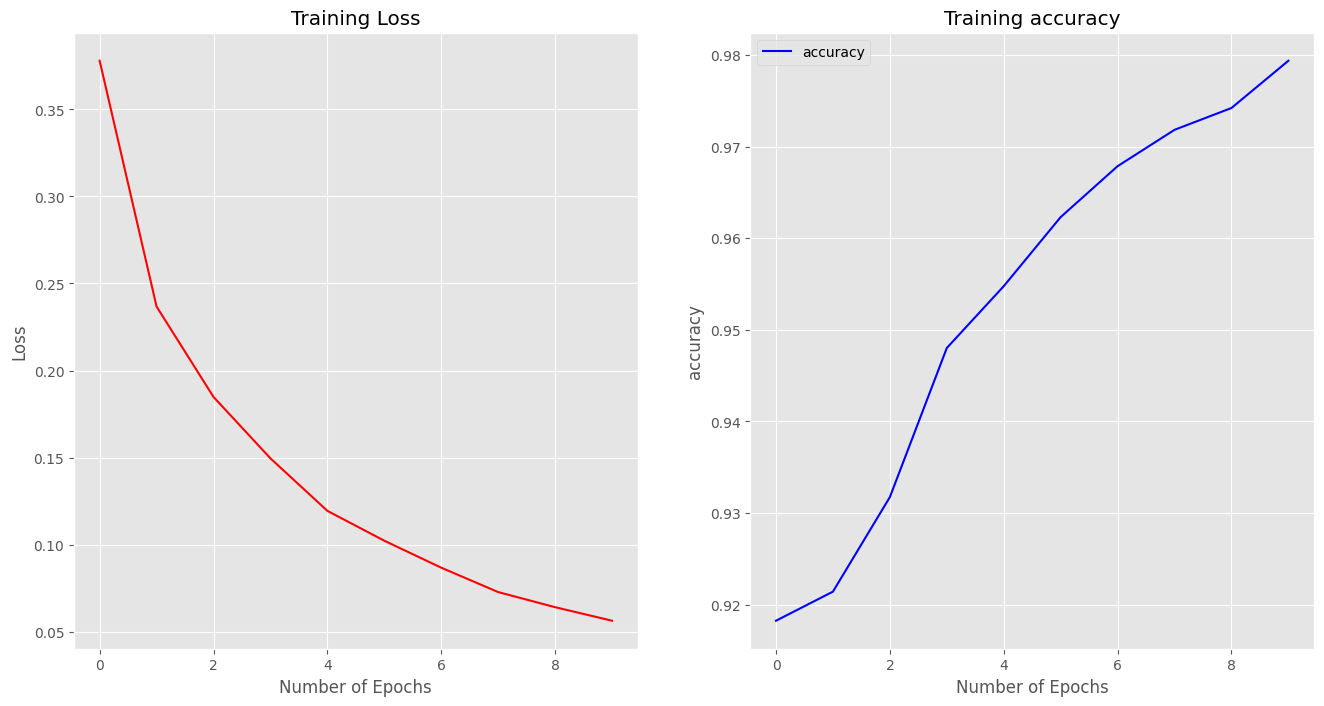

In [98]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

## Neural Network configuration 2

In [99]:
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [100]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
history = model.fit(x_train, y_train, batch_size = 10, epochs=10)

Epoch 1/10
252/252 [==============================] - 1s 3ms/step - loss: 0.4011 - accuracy: 0.9183
Epoch 2/10
252/252 [==============================] - 1s 3ms/step - loss: 0.2585 - accuracy: 0.9210
Epoch 3/10
252/252 [==============================] - 1s 3ms/step - loss: 0.2203 - accuracy: 0.9210
Epoch 4/10
252/252 [==============================] - 1s 2ms/step - loss: 0.1895 - accuracy: 0.9210
Epoch 5/10
252/252 [==============================] - 1s 2ms/step - loss: 0.1703 - accuracy: 0.9218
Epoch 6/10
252/252 [==============================] - 1s 2ms/step - loss: 0.1533 - accuracy: 0.9373
Epoch 7/10
252/252 [==============================] - 1s 3ms/step - loss: 0.1389 - accuracy: 0.9512
Epoch 8/10
252/252 [==============================] - 1s 3ms/step - loss: 0.1217 - accuracy: 0.9579
Epoch 9/10
252/252 [==============================] - 1s 4ms/step - loss: 0.1058 - accuracy: 0.9615
Epoch 10/10
252/252 [==============================] - 1s 3ms/step - loss: 0.0924 - accuracy: 0.9659

In [102]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 8)                 34920     
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 34961 (136.57 KB)
Trainable params: 34961 (136.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

20/20 [==============================] - 0s 3ms/step - loss: 0.2415 - accuracy: 0.9254
Test Loss: 0.24145755171775818
Test Accuracy: 0.9253968000411987


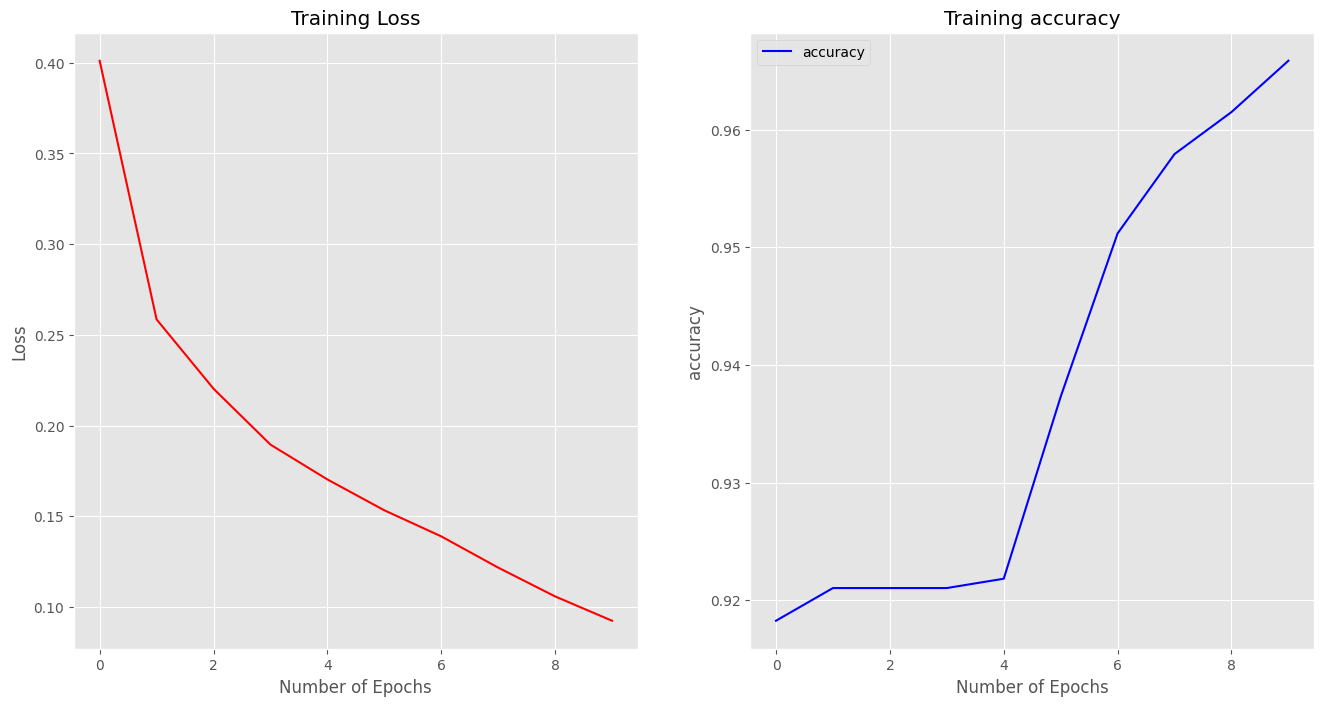

In [104]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

## Neural network configuration 3

In [105]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [106]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
history = model.fit(x_train, y_train, batch_size = 10, epochs=100)

Epoch 1/100
252/252 [==============================] - 1s 2ms/step - loss: 0.3386 - accuracy: 0.9190
Epoch 2/100
252/252 [==============================] - 1s 2ms/step - loss: 0.2206 - accuracy: 0.9210
Epoch 3/100
252/252 [==============================] - 1s 2ms/step - loss: 0.1782 - accuracy: 0.9238
Epoch 4/100
252/252 [==============================] - 1s 2ms/step - loss: 0.1473 - accuracy: 0.9476
Epoch 5/100
252/252 [==============================] - 1s 2ms/step - loss: 0.1217 - accuracy: 0.9563
Epoch 6/100
252/252 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9631
Epoch 7/100
252/252 [==============================] - 1s 3ms/step - loss: 0.0799 - accuracy: 0.9687
Epoch 8/100
252/252 [==============================] - 1s 3ms/step - loss: 0.0676 - accuracy: 0.9770
Epoch 9/100
252/252 [==============================] - 1s 3ms/step - loss: 0.0584 - accuracy: 0.9766
Epoch 10/100
252/252 [==============================] - 1s 3ms/step - loss: 0.0501 - accura

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                69840     
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 70017 (273.50 KB)
Trainable params: 70017 (273.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

20/20 [==============================] - 0s 2ms/step - loss: 0.8745 - accuracy: 0.9317
Test Loss: 0.8744903206825256
Test Accuracy: 0.9317460060119629


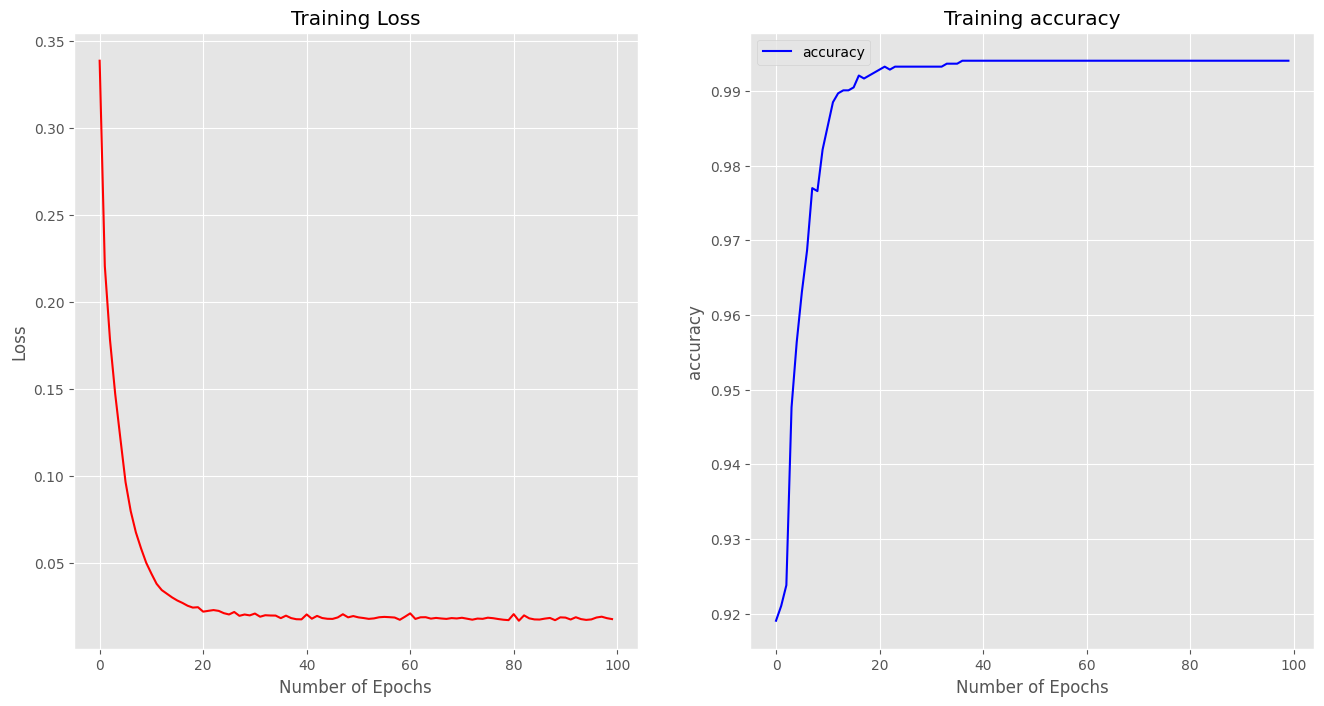

In [64]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()